# Convolutional Neural Network Sequential API

In [3]:
import pandas as pd
import random

theFile = pd.read_csv("../data/full_df.csv")
theFile

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg


In [4]:

target = theFile.loc[(theFile['Left-Diagnostic Keywords'] == 'cataract') | (theFile['Left-Diagnostic Keywords'] == 'normal fundus')]



In [5]:
print(len(target.loc[target['Left-Diagnostic Keywords'] == 'cataract']))
print(len(target.loc[target['Left-Diagnostic Keywords'] == 'normal fundus']))

268
2796


In [6]:
#As shown above, there are much more normal fundus entries than cataract
#Let's sample the normal fundus to get equivalent numbers of each class
cataract = target.loc[target['Left-Diagnostic Keywords'] == 'cataract']
normal = target.loc[target['Left-Diagnostic Keywords'] == 'normal fundus']
normal = normal.sample(268)
frames = [cataract, normal]
target = pd.concat(frames)

#now shuffle these randomly
# shuffle the DataFrame rows
target= target.sample(frac = 1)

In [7]:
pictures = target[['Left-Fundus']]

In [8]:
classnames = ['[\'N\']', '[\'D\']','[\'G\']','[\'C\']','[\'A\']','[\'H\']','[\'M\']','[\'O\']']
classnames

["['N']", "['D']", "['G']", "['C']", "['A']", "['H']", "['M']", "['O']"]

In [9]:
pictures = pictures.values.tolist()
pictures = sum(pictures, [])


In [9]:
#sampling 30 photos 
small_pics= random.sample(pictures, 536)


In [10]:
#grab target if label matches 
classifications=list()
for pic_name in small_pics:
    intermediate = theFile.loc[theFile['filename'] == pic_name]
    label = intermediate['Left-Diagnostic Keywords'].to_string().replace('\'','').replace('    ', '').replace(',', '')
    label = ''.join([i for i in label if not i.isdigit()])
    classifications.append(label)
#classifications contains the "target" corresponding to small_pics

In [12]:
import matplotlib.pyplot as plt
import cv2
actual_pics = []

img_res = 224

for file in small_pics:
    img = cv2.imread('../Challenge/images/' + file) #zero makes it greyscale
    #this is resizing all images
    img = cv2.resize(img, (img_res, img_res))
    actual_pics.append(img)

In [13]:
actual_pics[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

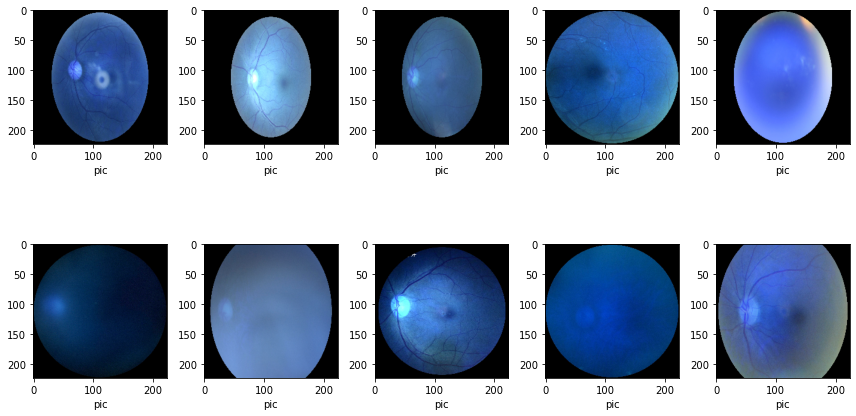

In [14]:
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(actual_pics)))
    image = actual_pics[sample]
    
    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.xlabel('pic')
plt.tight_layout()    

In [15]:
print(small_pics[0])
print(classifications[0])

2098_left.jpg
cataract


In [16]:
import numpy as np 
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils

#normalize our data !!
labels = {
    "cataract": 0,
    "normal fundus": 1
}

labels = np.array(labels)


for i in range(len(classifications)):
        if(classifications[i] == 'cataract'):
               classifications[i] = 0
        elif(classifications[i] == 'normal fundus'):
                classifications[i] = 1
                
classifications = utils.to_categorical(classifications)
   


In [17]:
actual_pics = np.array(actual_pics)
classifications = np.array(classifications)

classifications = np.array(classifications)
actual_pics.astype('float32')/255.0

#shuffle = false prevents data split being different everytime
X_train, X_test, y_train, y_test = train_test_split(actual_pics, classifications, test_size=0.2, shuffle = False)

#split test into validate and test, again making sure the data is always the same for consistency
X_train, xt, y_train, yt = train_test_split(X_train, y_train, test_size=0.1, shuffle = True)

In [18]:
#begin NN 
import logging
logging.basicConfig()
import tensorflow as tf 

In [19]:
import numpy
len(actual_pics[2][0])

224

In [20]:

print(X_train.shape)
y_train.shape

(385, 224, 224, 3)


(385, 2)

In [21]:
# convert to numpy arrays
x = np.array(X_train)
y = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

xt = np.array(xt)
yt = np.array(yt)

In [48]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import LeakyReLU

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'linear', input_shape=(img_res, img_res, 3)))
model.add(LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(layers.Conv2D(64, (3,3), activation = 'linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(layers.Conv2D(64, (3,3), activation = 'linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation = 'sigmoid'))
model.add(Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))
model.summary()
from tensorflow import keras
opt = keras.optimizers.SGD( momentum = 0.4, learning_rate = 0.001)

#early stopping stuff
# simple early stopping
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20, min_delta=0.01)

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])



Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
leaky_re_lu_19 (LeakyReLU)   (None, 109, 109, 64)      0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 54, 54, 64)       

In [49]:
print(np.size(x))
print(np.shape(x))
print(np.size(y))
print(np.shape(y))

57953280
(385, 224, 224, 3)
770
(385, 2)


In [50]:
#this stores the fitting information 
#put in our own data for the images and labelling stuff

history = model.fit(x, y, epochs = 10, validation_data = (xt, yt), callbacks = [es])

#dont forget to keep training until your accuracy becomes bad 

Epoch 1/10
13/13 [==============================] - 19s 1s/step - loss: 0.8312 - accuracy: 0.4779 - val_loss: 0.7089 - val_accuracy: 0.3721
Epoch 2/10
13/13 [==============================] - 18s 1s/step - loss: 0.8033 - accuracy: 0.4811 - val_loss: 0.7071 - val_accuracy: 0.3721
Epoch 3/10
13/13 [==============================] - 18s 1s/step - loss: 0.7694 - accuracy: 0.5437 - val_loss: 0.7059 - val_accuracy: 0.3721
Epoch 4/10
13/13 [==============================] - 18s 1s/step - loss: 0.7906 - accuracy: 0.4804 - val_loss: 0.7059 - val_accuracy: 0.3721
Epoch 5/10
13/13 [==============================] - 27s 2s/step - loss: 0.7830 - accuracy: 0.4957 - val_loss: 0.7064 - val_accuracy: 0.3721
Epoch 6/10
13/13 [==============================] - 26s 2s/step - loss: 0.7935 - accuracy: 0.4851 - val_loss: 0.7072 - val_accuracy: 0.3488
Epoch 7/10
13/13 [==============================] - 24s 2s/step - loss: 0.7685 - accuracy: 0.5181 - val_loss: 0.7094 - val_accuracy: 0.3721
Epoch 8/10
13/13 [==

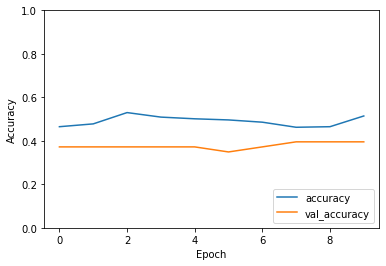

In [51]:
# Plot the change in accuracy and validation accruacy as a function of epochs

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend(loc='lower right')

In [52]:
performance = model.evaluate(X_test, y_test, verbose=1)



4/4 [==============================] - 2s 384ms/step - loss: 0.6979 - accuracy: 0.4630
